# Árboles de decisión con Python

Para la implementación de los árboles de decisión en Python, usaremos el data set `iris`.

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../../../GitHub/python-ml-course/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

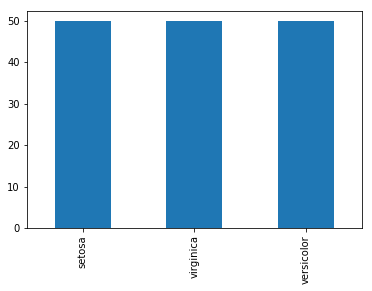

In [4]:
data['Species'].value_counts().plot(kind='bar')
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.3


In [11]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[-1]

In [12]:
target

'Species'

Ahora dividimos el dataset en conjuntos de training y testing.

In [13]:
import numpy as np

Generamos 1 y 0 con un 75% de 1.

In [14]:
data['is_train'] = np.random.uniform(0,1, len(data)) <= 0.75

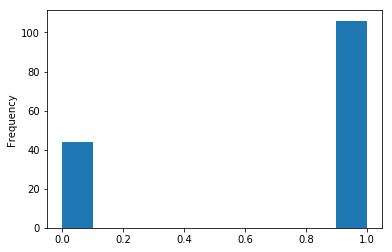

In [15]:
data['is_train'].astype(float).plot(kind = 'hist')
plt.show()

Divido en los conjuntos de datos respectivamente.

In [16]:
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [17]:
from sklearn.tree import DecisionTreeClassifier

Creamos el árbol pasando como criterio de creación `entropy` y con un `min_samples_split` de 20, es decir, el mínimo número de muestras requeridas para dividir un nodo interno. Opcionalmente le pasaremos `min_samples_leaf` para determinar el número mínimo de observaciones que debe tener un nodo hoja.

In [18]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

Ahora elaboramos las predicciones de la especie con el conjunto de testing.

In [19]:
preds = tree.predict(test[predictors])

Creamos una tabla de doble entrada para comparar el valor actual que hay en el data set con el valor predicho por el árbol de decisión.

In [20]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,16,0,0
versicolor,0,12,1
virginica,0,0,15


* De las 15 setosas del dataset, todas han sido clasificadas correctamente
* De las 17 versicolor 1 ha sido clasificada como virgínica por el árbol de decisión
* Las 10 virginicas han sido clasificadas correctamente

## Visualización del árbol de decisión

Para poder visualizar la clasificación generada por el árbol de decisión, lo primero que haremos será crear un archivo `.dot`, usando el método `export_graphviz` de `sklearn`.

Este tipo de archivo lleva asociado toda la información generada por el árbol.

In [21]:
from sklearn.tree import export_graphviz

In [22]:
with open("../resources/iris_dtree.dot", 'w') as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

Para representar el gráfico necesitamos el módulo `Source` de `graphviz`

In [23]:
import os
from graphviz import Source

In [24]:
file = open("../resources/iris_dtree.dot", 'r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 106\\nvalue = [34, 37, 35]"] ;\n1 [label="entropy = 0.0\\nsamples = 34\\nvalue = [34, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.999\\nsamples = 72\\nvalue = [0, 37, 35]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.527\\nsamples = 42\\nvalue = [0, 37, 5]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 35, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 35\\nvalue = [0, 35, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 30\\nvalue = [0, 0, 30]"] ;\n2 -> 8 ;\n}'

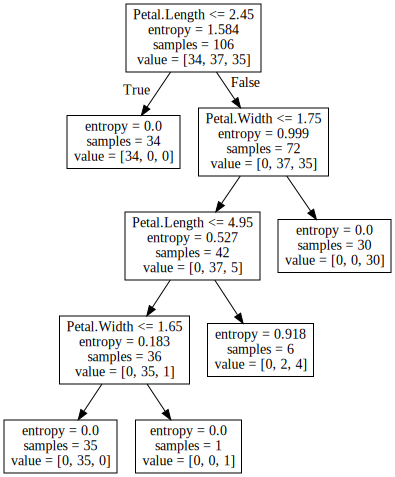

In [25]:
Source(text)

## Validación cruzada para la poda

Para la validación cruzada se divide el data set en tantos subconjuntos de training y testing como queramos.

Volvemos a crear el árbol con una ligera diferencia: en este caso pasaremos al algoritmo una profundidad máxima de `5`.

In [26]:
X = data[predictors]
Y = data[target]

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [27]:
from sklearn.model_selection import KFold

El parámetro `n_folds` indica la cantidad de veces que queremos dividir el data set para la validación. Le indicamos el número de datos con `n`.

In [28]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

Ahora le pedimos la puntuación al modelo. Esta es el promedio de las eficacias obtenidas en cada una de las divisiones (folds).

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
score = np.mean(cross_val_score(tree, X,Y, scoring='accuracy', cv = cv, n_jobs = 1))

In [31]:
score

0.9333333333333333

Vemos que el promedio de la eficacia es muy alta (cerca del 100%).

Si queremos ver las eficacias de cada división, simplemente no pasamos la función `mean`.

In [32]:
scores = cross_val_score(tree, X, Y, scoring='accuracy', cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

También podemos jugar con la profundidad del árbol y comparar la eficacia de cada modelo.

Al final aprovecharemos para ver qué variables son más importantes a la hora de clasificar.

In [35]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring='accuracy', cv = cv, n_jobs=1)
    score = np.mean(scores)

    print("Score para profundidad máxima = ",i, "es de: ", score)
    print("   ", tree.feature_importances_)

Score para profundidad máxima =  1 es de:  0.5666666666666667
    [0. 0. 1. 0.]
Score para profundidad máxima =  2 es de:  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para profundidad máxima =  3 es de:  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para profundidad máxima =  4 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad máxima =  5 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad máxima =  6 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad máxima =  7 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad máxima =  8 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad máxima =  9 es de:  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para profundidad m

In [ ]:
predictors

Vemos que el `score` máximo lo obtenemos para `i = 3`. Es decir, para este nivel de profundidad obtendremos la mayor precisión en la clasificacón posible.

Para `i = 1` toda la entropía se la lleva `Petal.Length`

En el resto de iteraciones vemos que una parte de la entropía menor se la lleva `Petal.Width`, mientras que las variables `Sepal.Length` y `Sepal.Width` no tienen significancia en el modelo.

## Bosque Aleatorio para clasificación

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X,Y)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [38]:
# forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

* Pueden aparecer `nan` porque el modelo en algunos casos puede no encontrar variables que reduzcan la entropía.
* Pueden aparecer casos que el bosque no clasifique (que se de una doble clasificación con valor `0.5`)
* Si esto ocurre, se pueden mejorar los resultados, por ejemplo, aumentando el número de árboles en el bosque

In [39]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97222222, 0.02777778, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [40]:
forest.oob_score_

0.9466666666666667

Vemos que la puntuación es mejor que en el caso de solo crear un árbol o de la validación cruzada.